## Env Creative

In [ ]:
# 安裝必要的庫（如果未安裝）
!pip install torch torchvision matplotlib

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

## Function Definition(定義模型和輔助函數)

### 定義簡單的卷積神經網絡

In [ ]:
class DIPModel(nn.Module):
    def __init__(self):
        super(DIPModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 3, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.conv4(x)
        return x

### 處理圖像

In [ ]:
# 讀取並預處理圖像
def load_image(img_path, transform=None):
    img = Image.open(img_path).convert('RGB')
    if transform:
        img = transform(img)
    return img

# 增加噪聲到圖像
def add_noise(img, noise_level=0.1):
    noise = torch.randn_like(img) * noise_level
    noisy_img = img + noise
    return noisy_img.clamp(0, 1)

### 模型訓練

In [ ]:
# 訓練DIP模型
def train_dip_model(model, noisy_img, target_img, num_epochs=5000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    noisy_img = noisy_img.unsqueeze(0)
    target_img = target_img.unsqueeze(0)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(noisy_img)
        loss = criterion(output, target_img)
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
            show_image(output.detach().squeeze(0).clamp(0, 1), title=f'Epoch {epoch}')

    return model

In [ ]:
# 顯示圖像
def show_image(tensor_img, title=None):
    img = tensor_img.permute(1, 2, 0).cpu().numpy()
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

## Main Function

### 讀取和顯示原始圖像

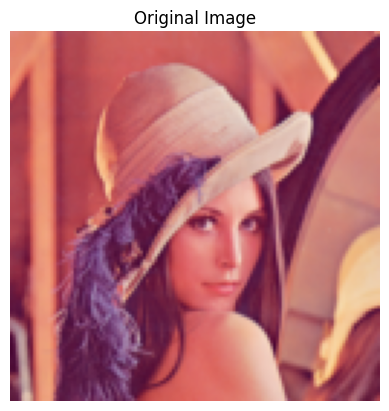

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

img_path = '/content/Image/Lenna_(test_image).png'
original_img = load_image(img_path, transform)
show_image(original_img, title='Original Image')

### 添加噪聲並顯示噪聲圖像

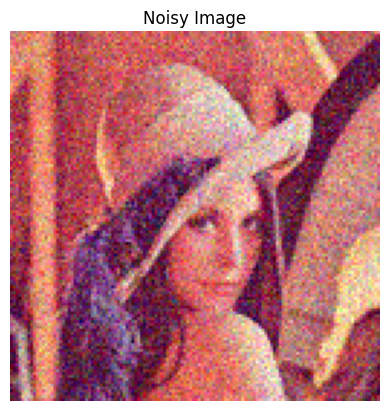

In [ ]:
noisy_img = add_noise(original_img)
show_image(noisy_img, title='Noisy Image')

### 構建和訓練DIP模型

Epoch [0/10000], Loss: 0.2836


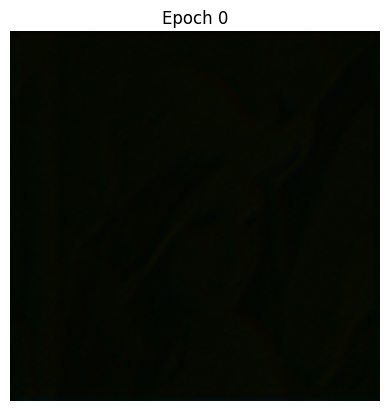

Epoch [1000/10000], Loss: 0.0013


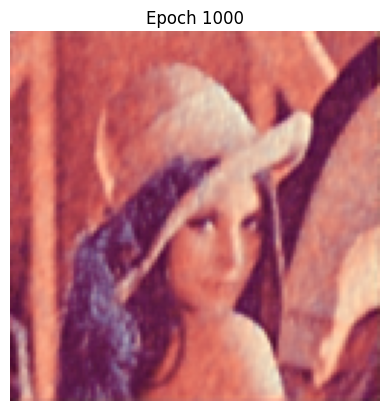

Epoch [2000/10000], Loss: 0.0011


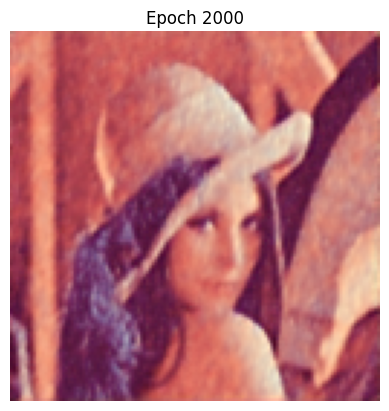

Epoch [3000/10000], Loss: 0.0011


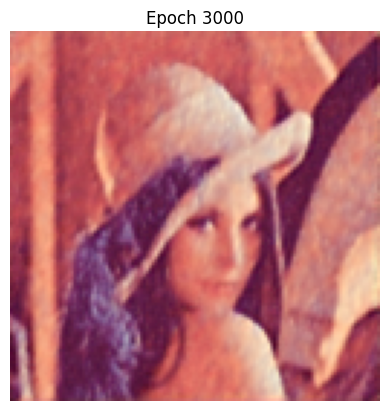

Epoch [4000/10000], Loss: 0.0010


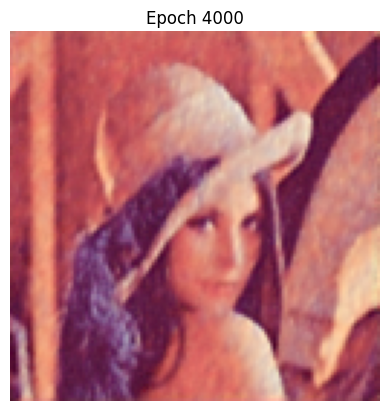

Epoch [5000/10000], Loss: 0.0013


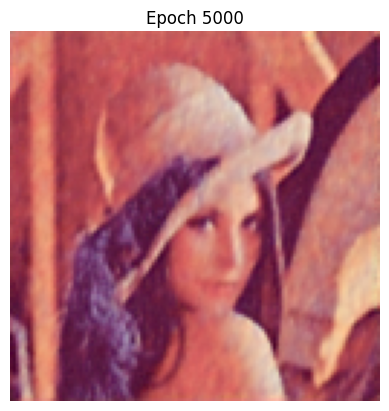

Epoch [6000/10000], Loss: 0.0010


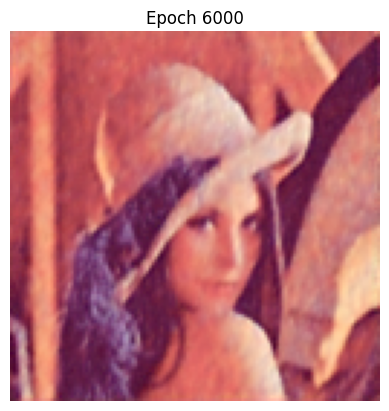

Epoch [7000/10000], Loss: 0.0009


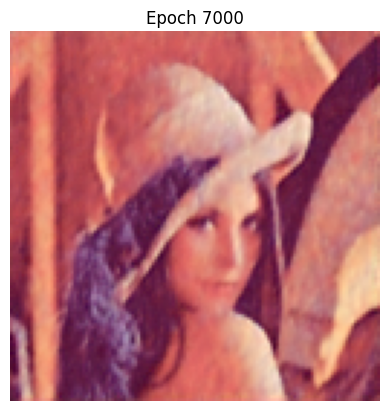

Epoch [8000/10000], Loss: 0.0009


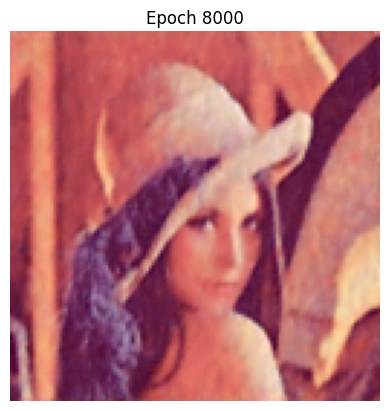

Epoch [9000/10000], Loss: 0.0009


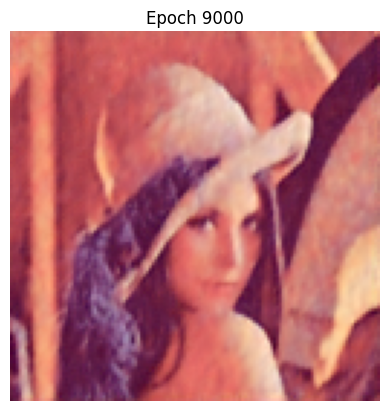

In [ ]:
dip_model = DIPModel()
dip_model = train_dip_model(dip_model, noisy_img, original_img, num_epochs=10000, lr=0.01)

### 使用訓練好的DIP模型生成去噪圖像

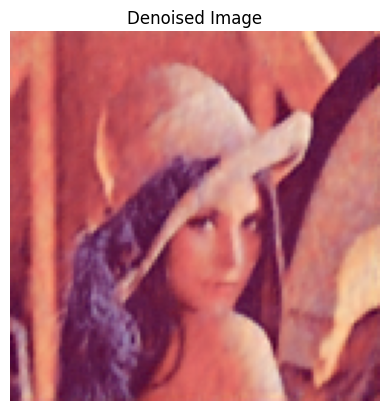

In [ ]:
with torch.no_grad():
    denoised_img = dip_model(noisy_img.unsqueeze(0)).squeeze(0).clamp(0, 1)
show_image(denoised_img, title='Denoised Image')